23410 7017
23058 7484
16132 7423
14916 7479
12077 7519
0 0
63 0


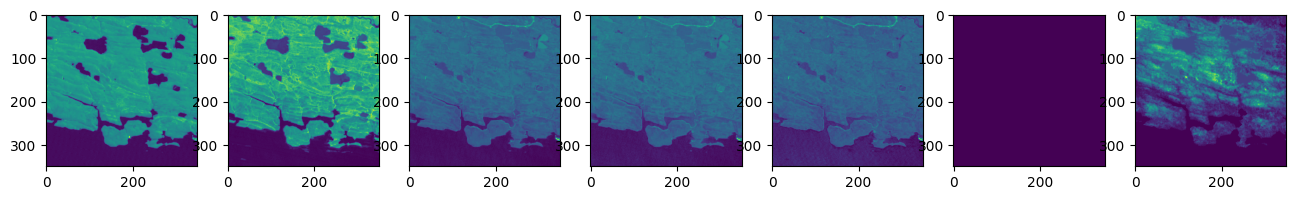

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import tifffile
import albumentations as A
import os
import glob

IMG = 'datasets/datasets/train_satellite/AB602248_satellite.tif'
image = tifffile.imread(IMG)
plt.figure(figsize=(16, 16))
for i in range(7):
    plt.subplot(1, 7, i + 1)
    plt.imshow(image[:, :, i])
    print(image[:, :, i].max(), image[:, :, i].min())
plt.show()

In [27]:
train_path = "datasets/datasets/train_satellite"
test_path = "datasets/datasets/test_satellite"

all_list = []
# read all tiff files, and save to train_ids.txt
for filename in glob.glob(f"{train_path}/*.tif"):
    all_list.append(filename.replace('datasets/datasets/', ''))

# split train and test
train_list = all_list[:int(len(all_list)*0.85)]
test_list = all_list[int(len(all_list)*0.85):]

need_pred_list = []

for filename in glob.glob(f"{test_path}/*.tif"):
    need_pred_list.append(filename.replace('datasets/datasets/', ''))

with open('datasets/datasets/train_ids.txt', 'w') as f:
    for item in train_list:
        f.write("%s\n" % item)
        
with open('datasets/datasets/val_ids.txt', 'w') as f:
    for item in test_list:
        f.write("%s\n" % item)

with open('datasets/datasets/need_pred_ids.txt', 'w') as f:
    for item in need_pred_list:
        f.write("%s\n" % item)

all_list_with_pred = []
all_list_with_pred.extend(all_list)
all_list_with_pred.extend(need_pred_list)


with open('datasets/datasets/all_ids.txt', 'w') as f:
    for item in all_list_with_pred:
        f.write("%s\n" % item)